In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

Exploratory Data Analysis - EDA
- printing first 5 rows of datafram
- data types and counts of each column
- concise summaries of the data
- detecting null values

In [4]:
df = pd.read_csv('Housing.csv')
print(df.head())
print(df.info())
print(df.describe())

print(df.isnull().sum())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

- filling in the null values with the median
- encoding a categorical column using one-hot encoding

In [5]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median())

print(df.isnull().sum())

df = pd.get_dummies(df, columns=['ocean_proximity'], prefix='ocean')

df.head()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  ocean_<1H OCEAN  \
0         322         126         8.3252              452600            False   
1        2401        1138         8.3014              358500            False   
2         496         177         7.2574              352100            False   
3         558         219         5.6431              341300            False   
4         565         259         3.8462              342200            False   

   ocean_INLAND  ocean_ISLAND  ocean_NEAR BAY  ocean_NEAR OCEAN  
0         False         False            True             False  
1         False         False            True             False  
2         False         False            True             False  
3         False         False            True             False  
4         False         False            True             False

- creating a grid of scatterplots and a correlation heatmap to visualize the relationship between the variables help pick out more relevant features

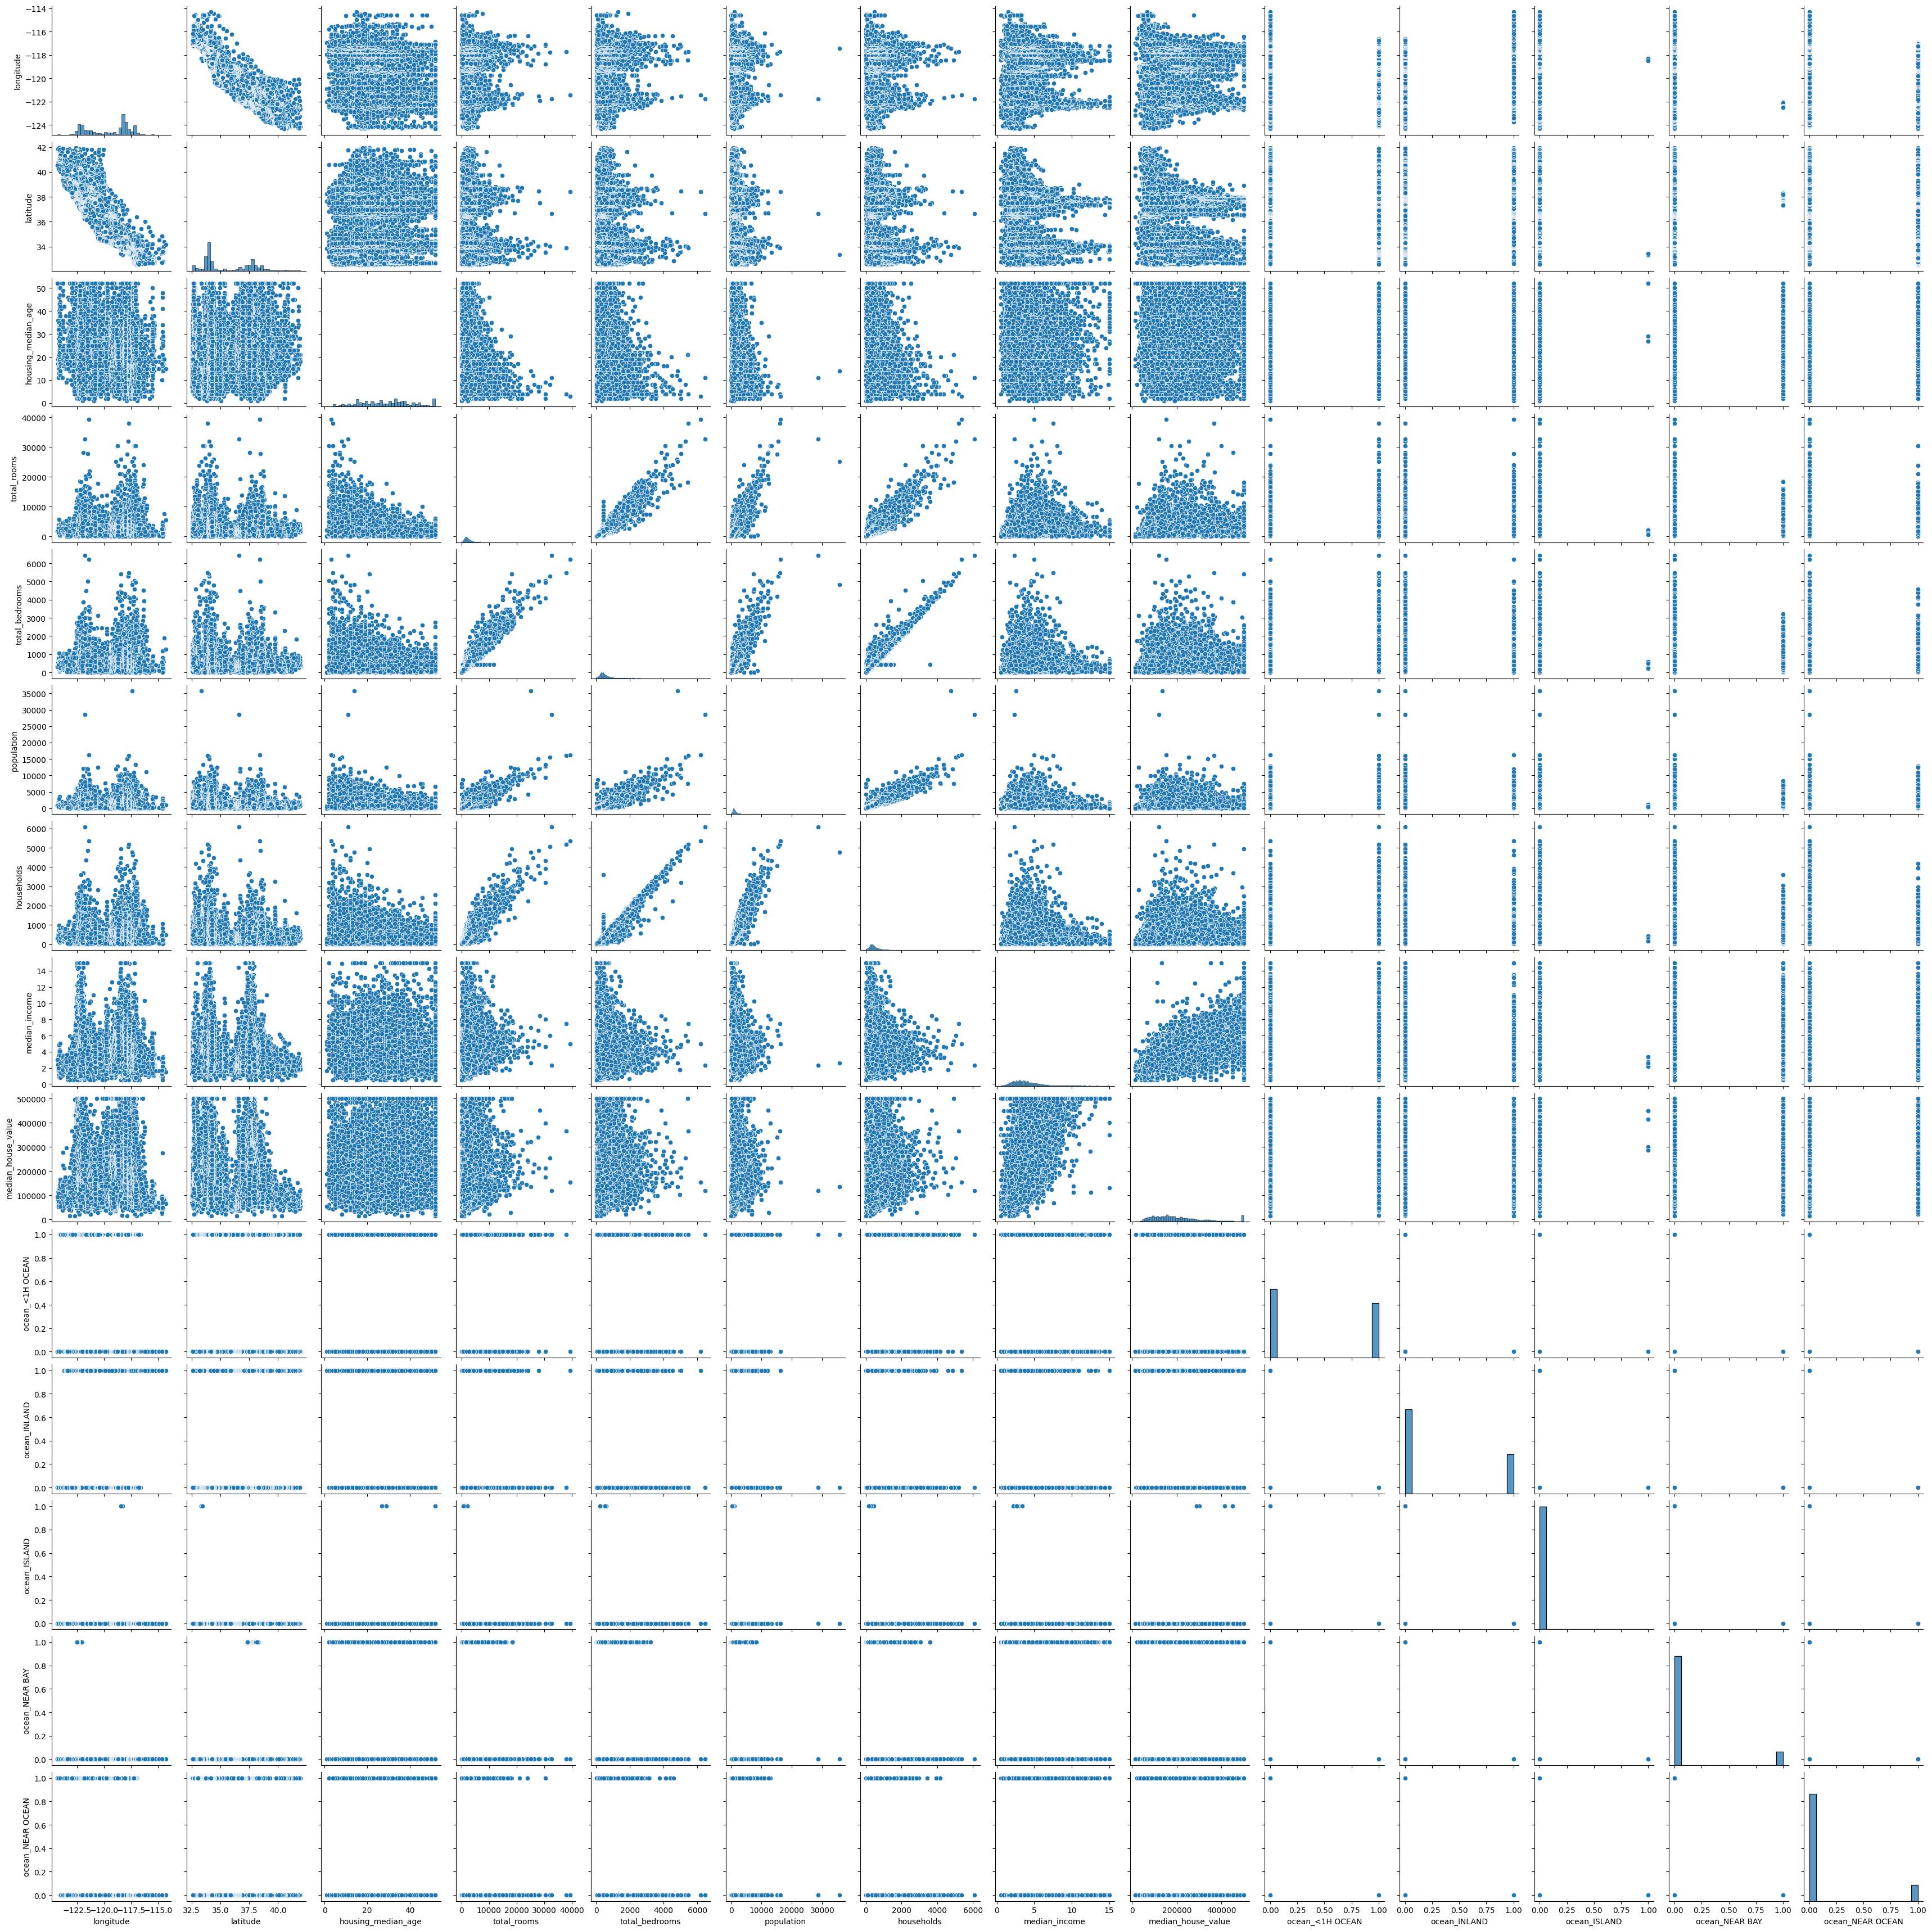

In [6]:
sns.pairplot(df)
plt.show()

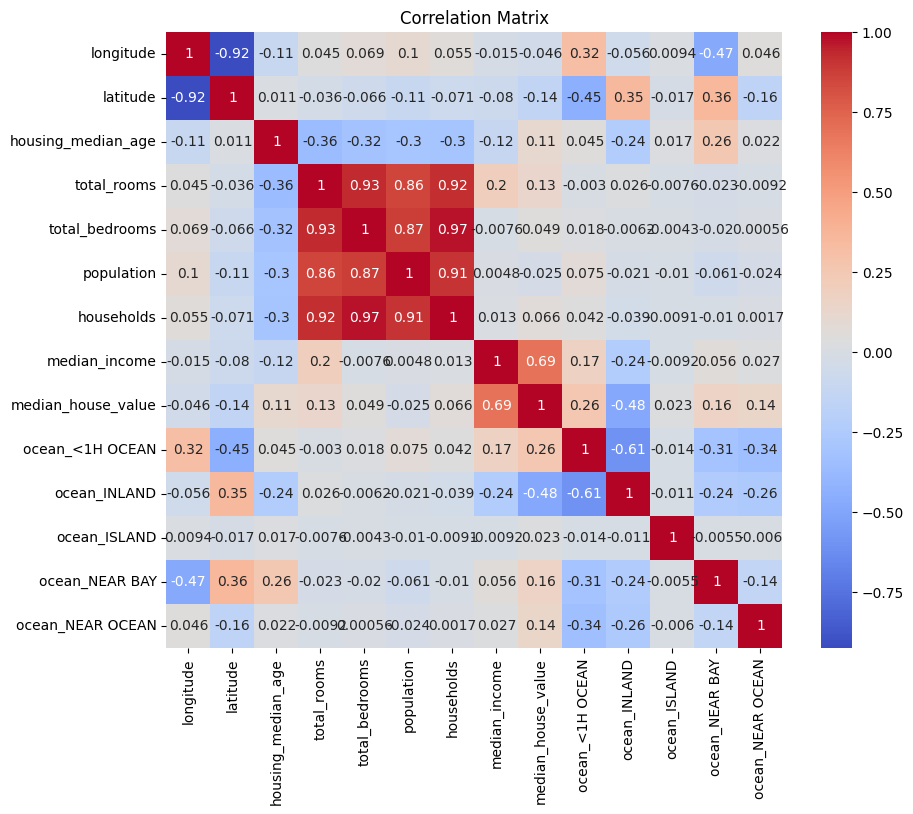

In [ ]:
c_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

- plotting histograms for all numerical values in the dataframe to help examine the distribution, skewness and scale of the features

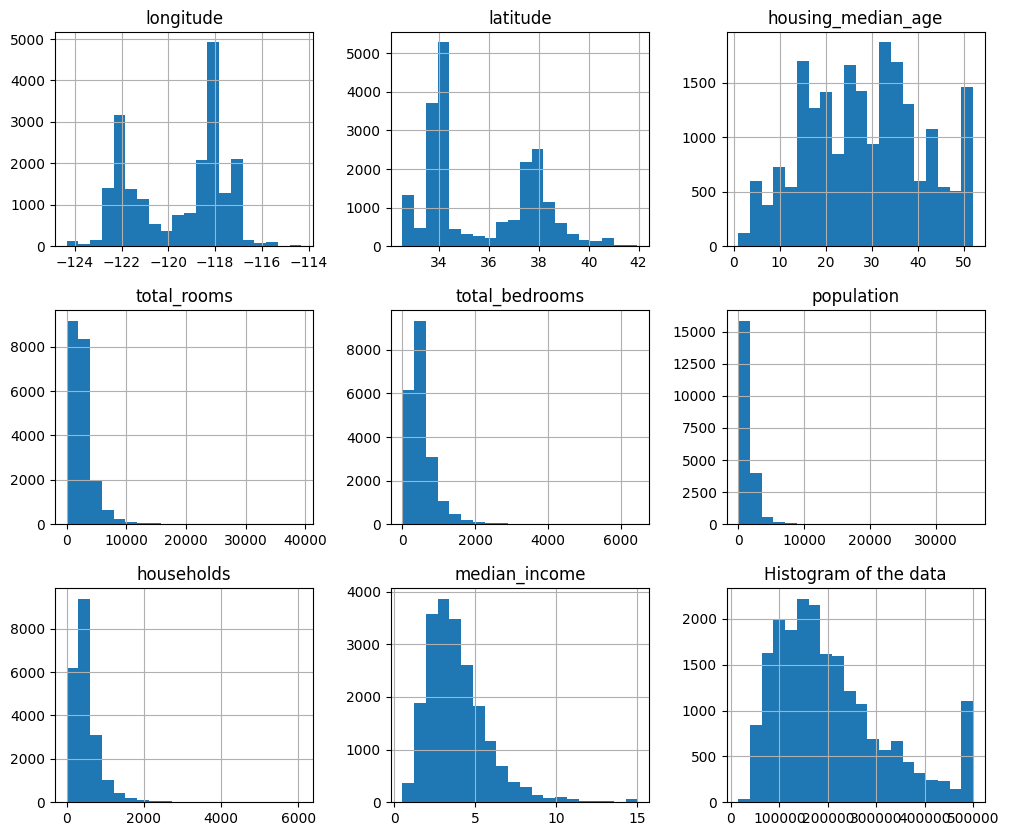

In [8]:
df.hist(figsize=(12,10), bins=20)
plt.title('Histogram of the data')
plt.show()

- grid of boxplots to view the distribution with median, quartiles, and outliers.

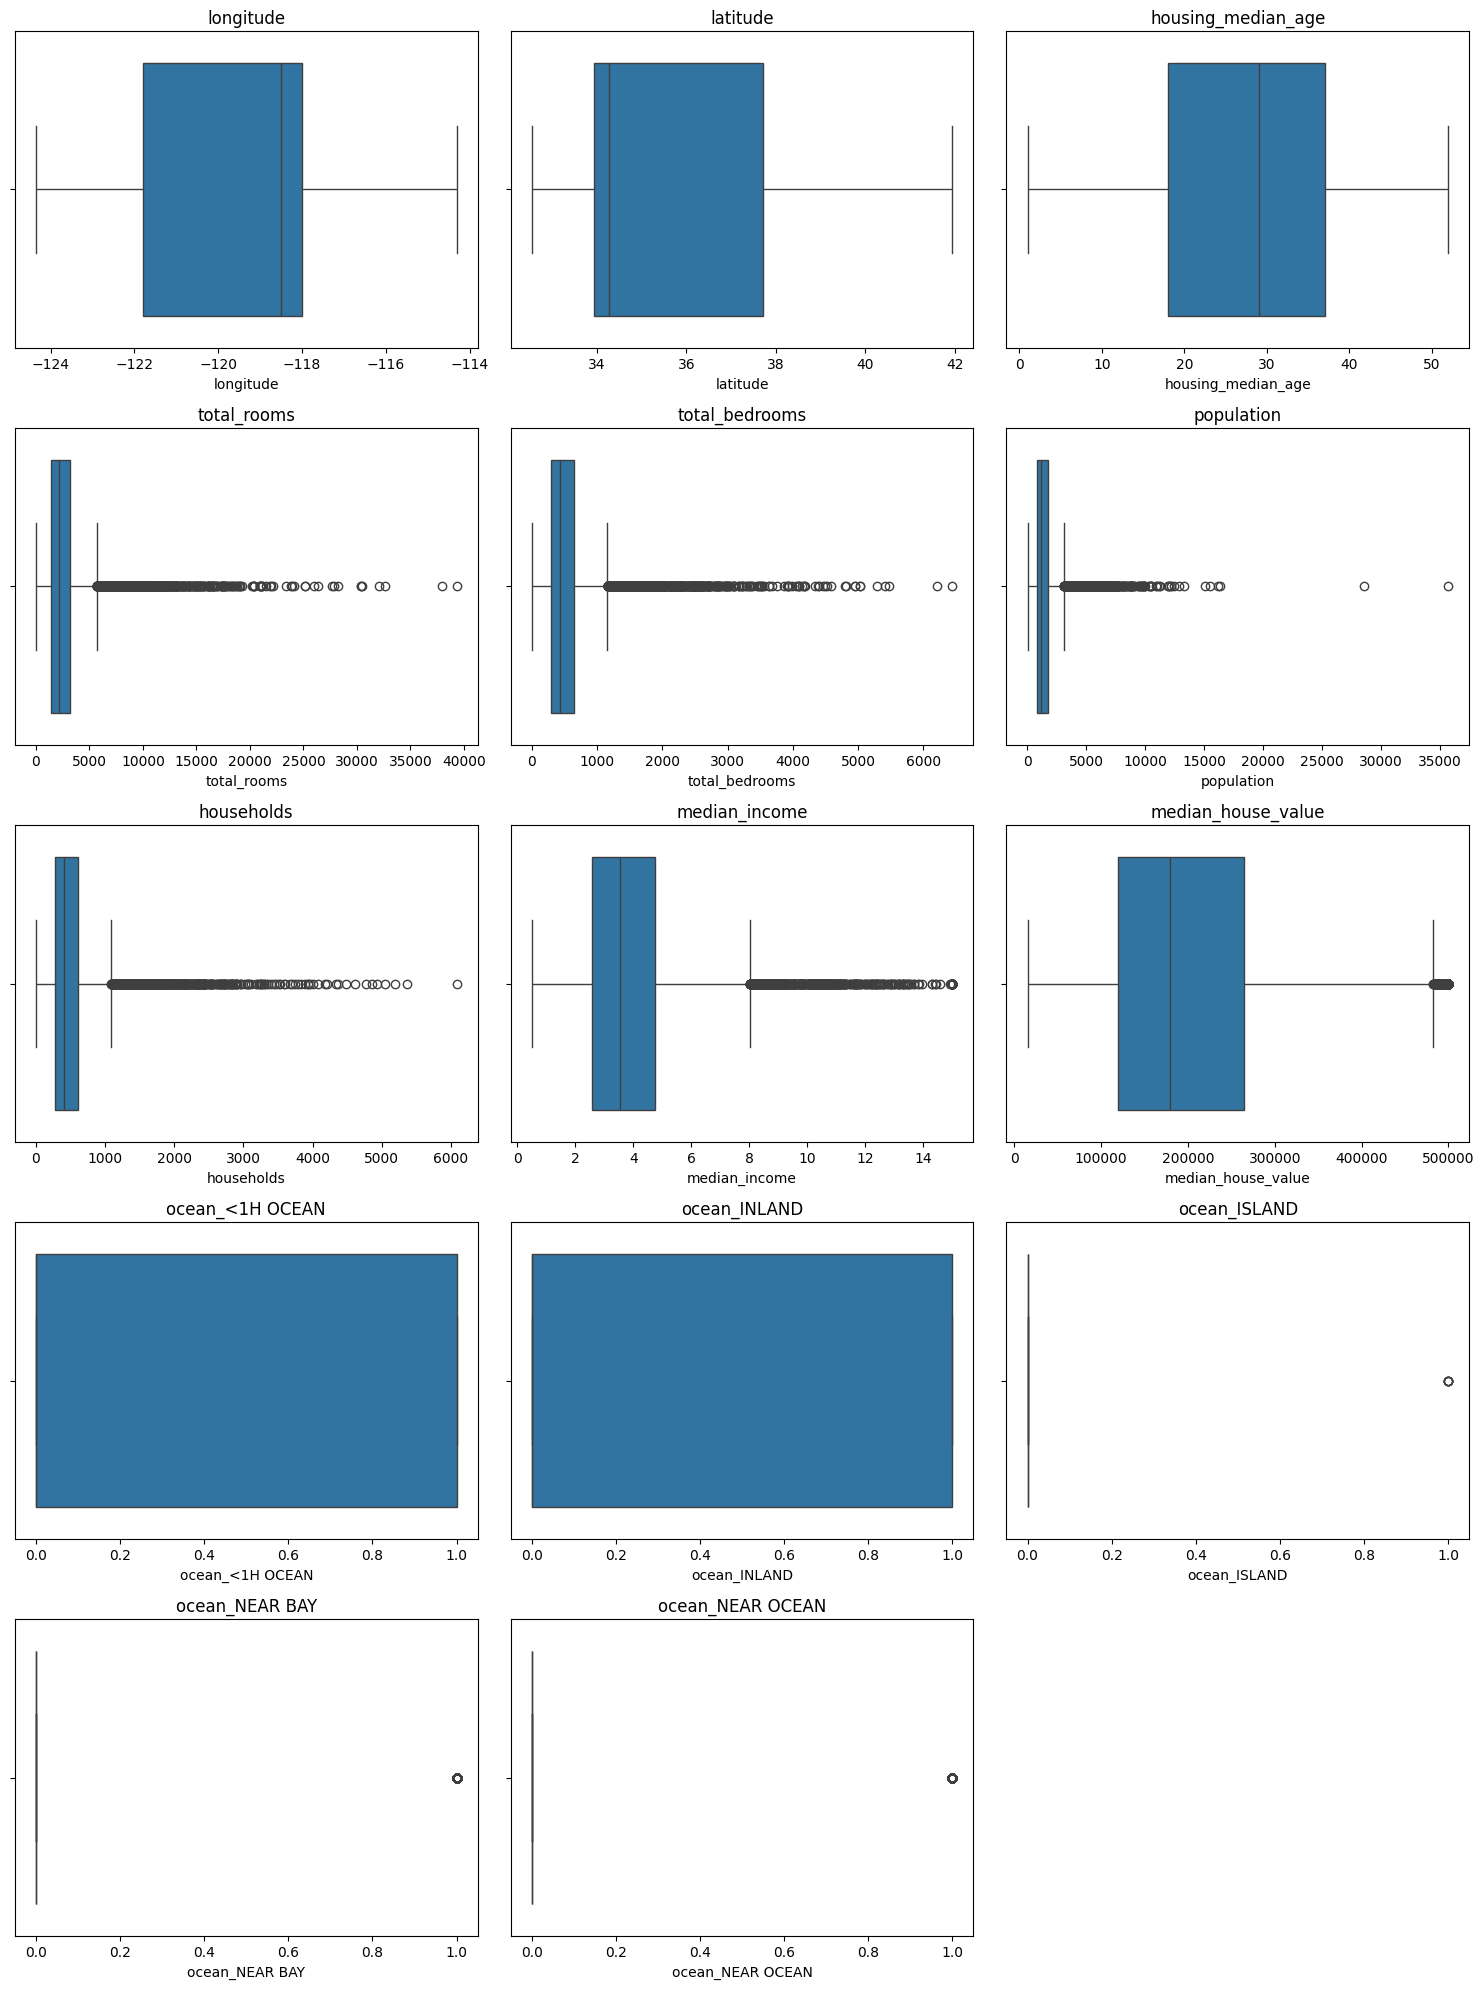

In [9]:
plt.figure(figsize=(15,20))
for i, col in enumerate(df.columns):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

- assigning the dependent and independent variables

In [12]:
x1 = df[['median_income']]     #predictor
y1 = df['median_house_value']  #target

- splitting data into training and test datasets

In [13]:
x_train, x_test, y_train, y_test = train_test_split( x1, y1, test_size=0.2, random_state=42)

- initialising and training the model

In [15]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

- generating predictions and evalution metrics

Mean Squared Error: 7091157771.76555
Root Mean Squared Error: 84209.01241414454
R^2 Score: 0.45885918903846656


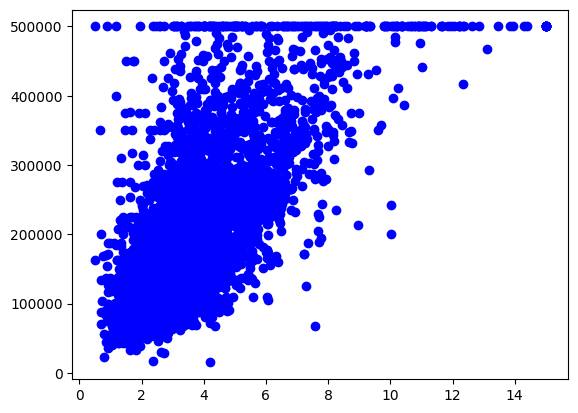

In [ ]:
y_pred = model1.predict(x_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred)}')

print(f'R^2 Score: {r2_score(y_test, y_pred)}')

plt.scatter(x_test, y_test, color = 'blue', label = 'Actual Values')

- plotting actual values on a scatter plot
- regression line
- dotted line for predictions

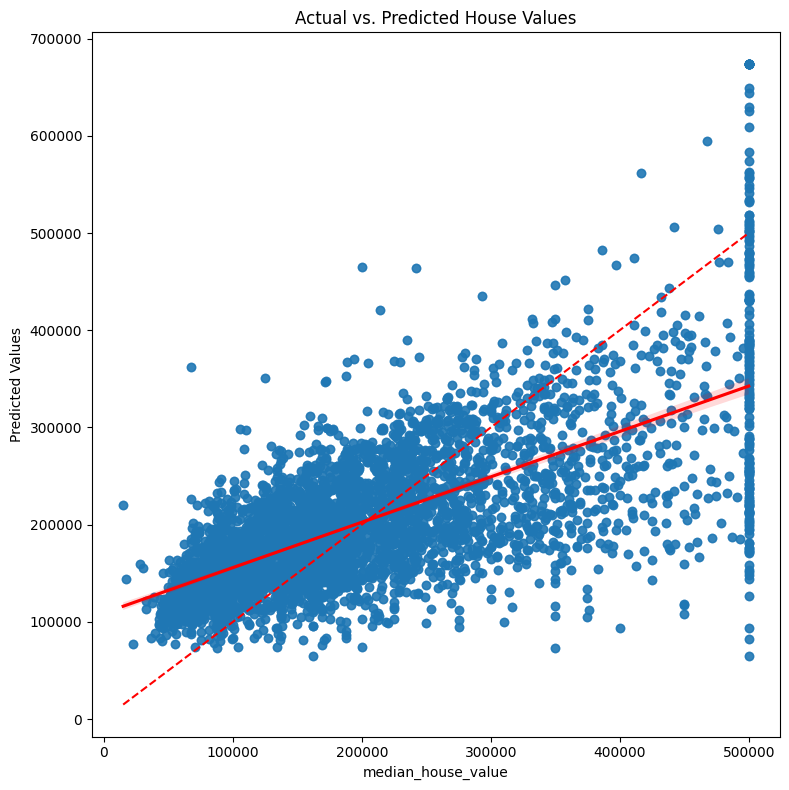

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted House Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})

plt.tight_layout()
plt.show()

- initialising dependent and independent variables for multiple linear regression and splitting it into training and testing sets

In [31]:
x2 = df[['median_income','housing_median_age','population','ocean_NEAR OCEAN','ocean_NEAR BAY']]
y2 = df['median_house_value']


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

- intialising and training the model
- generating predictions and evaluation metrics

In [34]:
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred = model2.predict(x_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred)}')

print(f'R^2 Score: {r2_score(y_test, y_pred)}')


Mean Squared Error: 6254165204.070587
Root Mean Squared Error: 79083.28018026685
R^2 Score: 0.5227318106087603


-- Multiple Linear Regression(R^2 score = 0.5) performs better than Simple Linear Regression(R^2 score = 0.4) in this case.

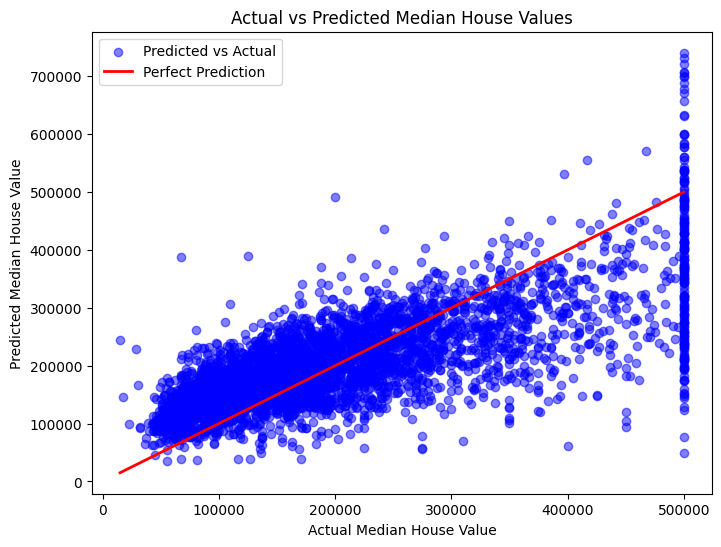

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label= 'Predicted vs Actual')

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    lw=2,
    label='Perfect Prediction'
)

plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Values')
plt.legend()
plt.show()

- scatterplots plotting actual values in green and predicted values in blue

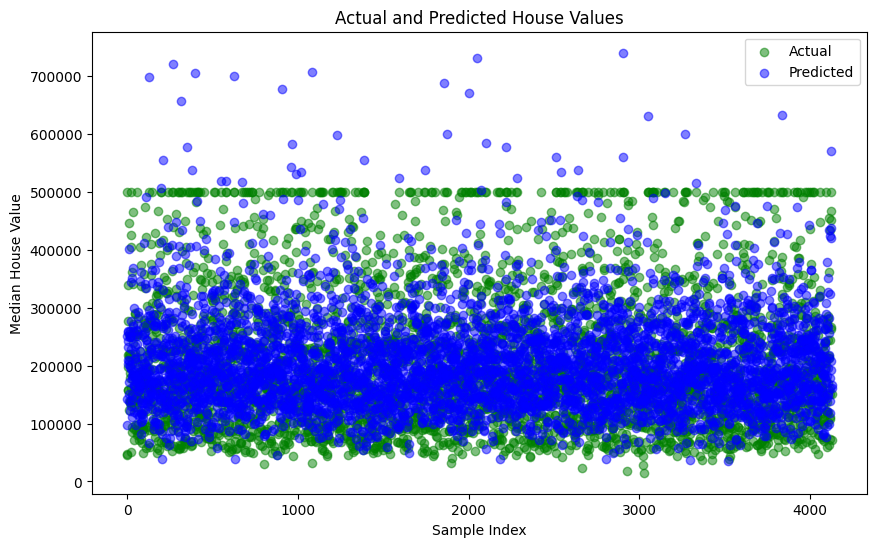

In [40]:
plt.figure(figsize=(10,6))

# Get index positions
indices = range(len(y_test))

# Plot actual values
plt.scatter(indices, y_test, color='green', alpha=0.5, label='Actual')

# Plot predicted values
plt.scatter(indices, y_pred, color='blue', alpha=0.5, label='Predicted')

plt.xlabel("Sample Index")
plt.ylabel("Median House Value")
plt.title("Actual and Predicted House Values")
plt.legend()
plt.show()